
# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

Dataset Link  :-  https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data

Dataset Description :  The "Vehicle Sales and Market Trends Dataset" provides a comprehensive collection of information pertaining to the sales transactions of various vehicles. This dataset encompasses details such as the year, make, model, trim, body type, transmission type, VIN (Vehicle Identification Number), state of registration, condition rating, odometer reading, exterior and interior colors, seller information, Manheim Market Report (MMR) values, selling prices, and sale dates.I has 558837 rows and 16 Columns.

#Loading the dataset

In [2]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

# Loading the dataset
file_path = '/content/car_prices.csv'
data = pd.read_csv(file_path)

print("File Reading Successful")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File Reading Successful


#EDA

In [3]:
# Initial inspection :
print("Initial Dataset:")
print(data.head())
print("\n\n-------------------------------------\n\n")
print(data.info())

Initial Dataset:
   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                

In [4]:
data.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [5]:
# Checking for missing values , we will handle the missing value later in the code
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


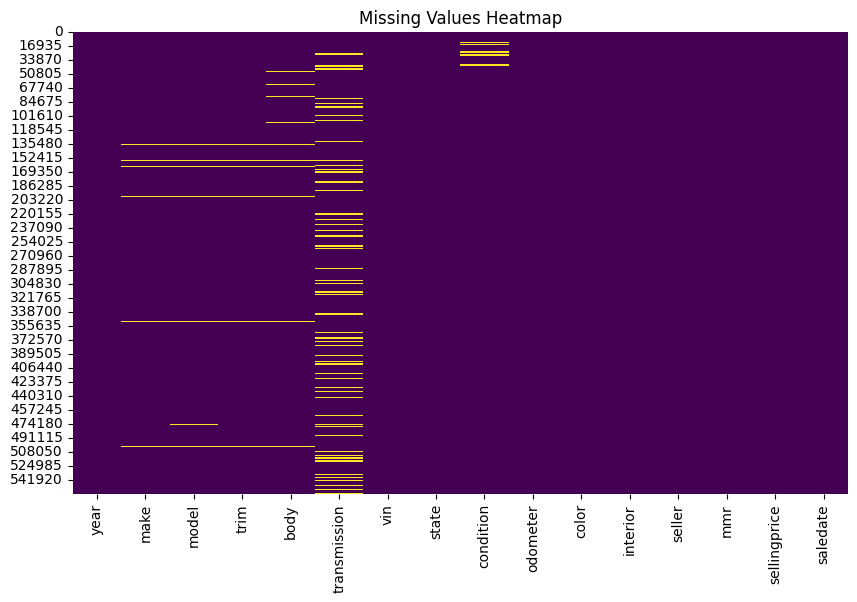

In [6]:
# Visualize missing values using heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [7]:
# Check if 'saledate' exists in the DataFrame before conversion
if 'saledate' in data.columns:
    # Convert the 'saledate' column to datetime, ensuring proper parsing
    data['saledate'] = pd.to_datetime(data['saledate'], errors='coerce', utc=True)

    # Extract useful features from the 'saledate' column
    data['sale_year'] = data['saledate'].dt.year
    data['sale_month'] = data['saledate'].dt.month
    data['sale_day'] = data['saledate'].dt.day
    data['sale_weekday'] = data['saledate'].dt.weekday

    # Dropping 'saledate' column as it is now split into several new columns
    data = data.drop(['saledate'], axis=1)
else:
    print("'saledate' column already processed or not present.")


<ipython-input-7-3119a242407a>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['saledate'] = pd.to_datetime(data['saledate'], errors='coerce', utc=True)


<ipython-input-8-a297ee55f7d0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sale_year', palette='Set2')


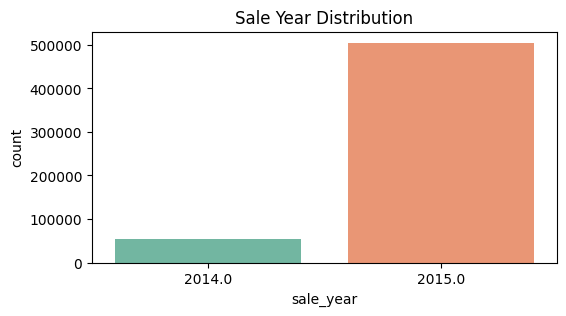

<ipython-input-8-a297ee55f7d0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sale_month', palette='Set2')


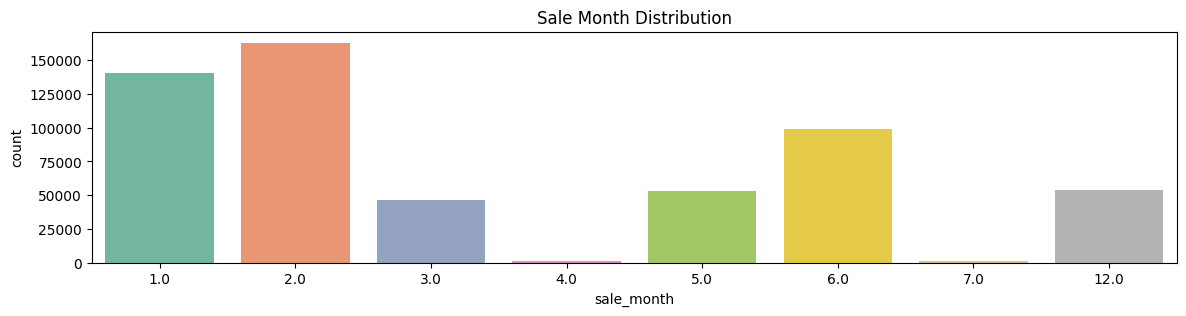

In [8]:
# Visualizing sale year and month distributions
plt.figure(figsize=(6, 3))
sns.countplot(data=data, x='sale_year', palette='Set2')
plt.title('Sale Year Distribution')
plt.show()

plt.figure(figsize=(14, 3))
sns.countplot(data=data, x='sale_month', palette='Set2')
plt.title('Sale Month Distribution')
plt.show()

**Data Types**

In [9]:
#data types
print("\nColumn Data Types Before:")
print(data.dtypes)


Column Data Types Before:
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
sale_year       float64
sale_month      float64
sale_day        float64
sale_weekday    float64
dtype: object


**Duplicate Values**

In [10]:
#duplicate values
print("\nNumber of Duplicate Rows:", data.duplicated().sum())
data = data.drop_duplicates()
print("\nAfter Removing Duplicates:")
print(data.info())


Number of Duplicate Rows: 0

After Removing Duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  sale_year     558799 non-null  float64
 16  sale_month    558799 non-null  floa

**Handling Missing Values**

In [11]:
from sklearn.impute import SimpleImputer

# --- Handling Missing Values ---

# Impute missing values using SimpleImputer (for numerical columns)
numerical_columns = data.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# Impute missing categorical columns using the most frequent value
categorical_columns = data.select_dtypes(include=[object]).columns
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer.fit_transform(data[categorical_columns])

# Check if any missing values remain
print("\nMissing Values After Imputation:")
print(data.isnull().sum())



Missing Values After Imputation:
year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
sale_year       0
sale_month      0
sale_day        0
sale_weekday    0
dtype: int64


**Checking for the outliers and removing them**


Number of Outliers in Each Column:
year: 4021 outliers
condition: 0 outliers
odometer: 10382 outliers
mmr: 16315 outliers
sellingprice: 16354 outliers
sale_year: 53765 outliers
sale_month: 0 outliers
sale_day: 0 outliers
sale_weekday: 23096 outliers


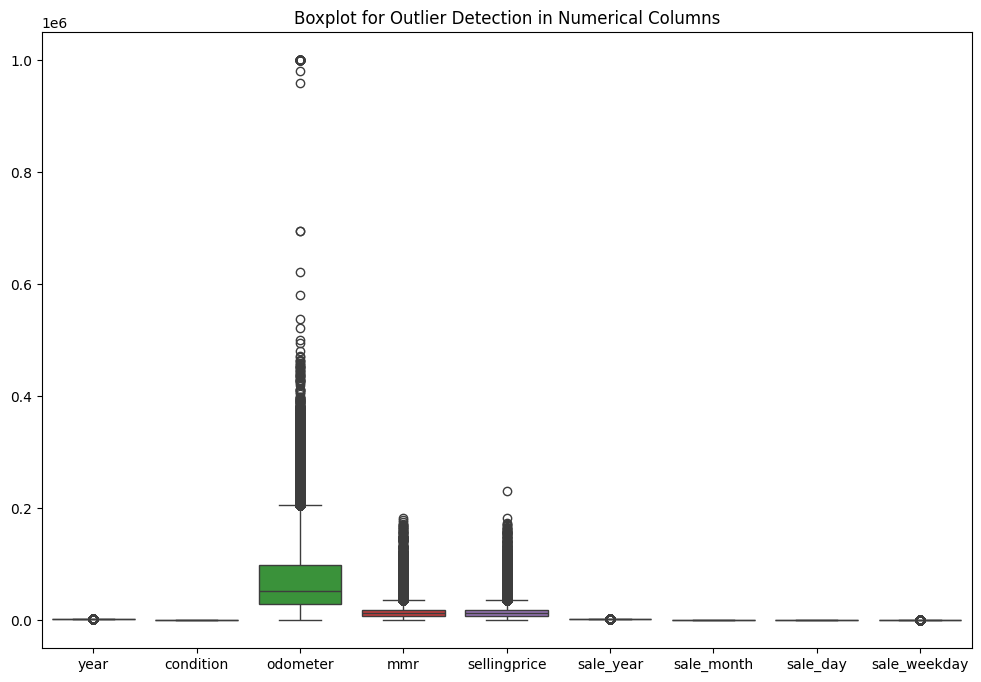

Original data size: (558837, 19)
Data size after outlier removal: (463570, 19)


In [12]:
#For Outliers
def count_outliers_iqr(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = outliers.shape[0]  # Number of outliers
    return outlier_counts

# Count outliers using IQR
outlier_counts = count_outliers_iqr(data)

# Print number of outliers for each numerical column
print("\nNumber of Outliers in Each Column:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} outliers")

# --- Visualizing Outliers ---

# Boxplot for visualizing outliers in numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.title('Boxplot for Outlier Detection in Numerical Columns')
plt.show()

def remove_outliers_iqr(df):
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Removing outliers
data_no_outliers = remove_outliers_iqr(data)

# Verify removal of outliers
print(f"Original data size: {data.shape}")
print(f"Data size after outlier removal: {data_no_outliers.shape}")

**Feature Engineering – Encoding Categorical Variables**

In [13]:
from sklearn.preprocessing import LabelEncoder

# --- Feature Engineering: Encoding Categorical Variables ---

# Applying LabelEncoder or One-Hot Encoding
for col in categorical_columns:
    if data[col].nunique() > 10:  # High cardinality: Use LabelEncoder
        label_encoder = LabelEncoder()
        data[col] = label_encoder.fit_transform(data[col])
    else:  # Low cardinality: Use One-Hot Encoding
        data = pd.get_dummies(data, columns=[col], drop_first=True)

# Checking  the first few rows after encoding
print("\nData after Encoding:")
print(data.head())



Data after Encoding:
     year  make  model  trim  body     vin  state  condition  odometer  color  \
0  2015.0    24    658   998    36  403800     29        5.0   16639.0     43   
1  2015.0    24    658   998    36  403792     29        5.0    9393.0     43   
2  2014.0     3      9   283    37  507008     29       45.0    1331.0     33   
3  2015.0    51    596  1399    37  546651     29       41.0   14282.0     43   
4  2014.0     3     42   498    37  508041     29       43.0    2641.0     33   

   ...  seller      mmr  sellingprice  sale_year  sale_month  sale_day  \
0  ...    7202  20500.0       21500.0     2014.0        12.0      16.0   
1  ...    7202  20800.0       21500.0     2014.0        12.0      16.0   
2  ...    4978  31900.0       30000.0     2015.0         1.0      14.0   
3  ...   13795  27500.0       27750.0     2015.0         1.0      28.0   
4  ...    4978  66000.0       67000.0     2014.0        12.0      18.0   

   sale_weekday  transmission_automatic  trans

**Feature Scaling and Model Data Preparation**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Data Preprocessing for Modeling ---

# Define features and target variable
X = data.drop(['sellingprice'], axis=1)  # 'sellingprice' is the target variable
y = data['sellingprice']

# Use a small sample of the data for faster processing
X = X.sample(n=5000, random_state=42)
y = y.sample(n=5000, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling for models like Random Forest and Decision Tree
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Models

# **1 .  Model – K-Nearest Neighbors (KNN)**


KNN Model Evaluation:
R² (Accuracy): 80.31%
Mean Absolute Error (MAE): 3040.25
Root Mean Squared Error (RMSE): 4237.47


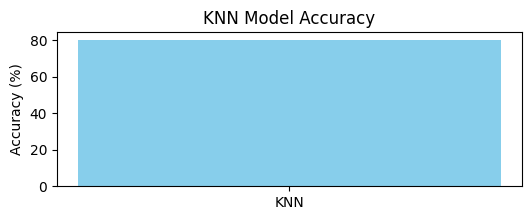

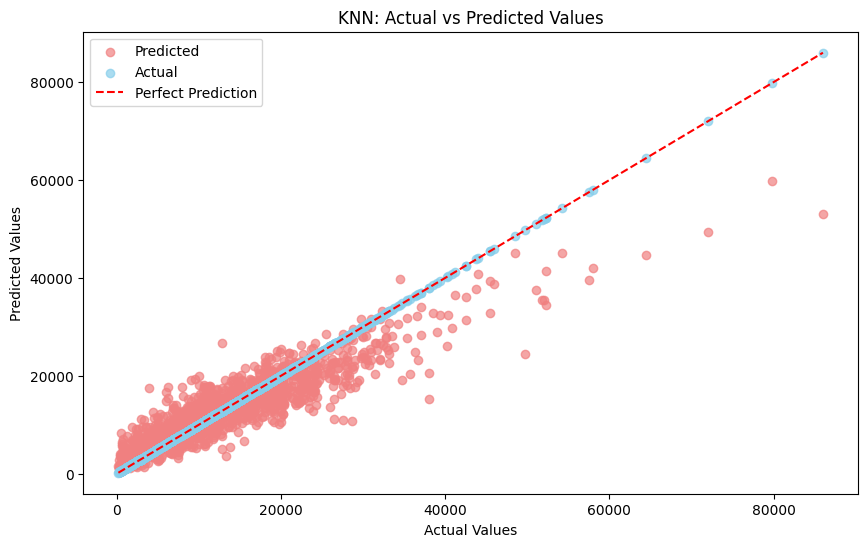

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Model 1: K-Nearest Neighbors (KNN) ---

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# KNN Evaluation
def evaluate_model(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return r2, mae, rmse

# Get KNN Evaluation Scores
r2_knn, mae_knn, rmse_knn = evaluate_model(y_test, y_pred_knn)

# Print evaluation scores
print("KNN Model Evaluation:")
print(f"\033[1mR² (Accuracy): {r2_knn * 100:.2f}%\033[0m")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")

# KNN Model Performance Visualization
plt.figure(figsize=(6, 2))
plt.bar(['KNN'], [r2_knn * 100], color='skyblue')
plt.ylabel('Accuracy (%)')
plt.title('KNN Model Accuracy')
plt.show()

# Prediction vs Actual Plot for KNN with different colors for predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, color='lightcoral', label='Predicted', alpha=0.7)
plt.scatter(y_test, y_test, color='skyblue', label='Actual', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN: Actual vs Predicted Values')
plt.legend()
plt.show()


# Summary for KNN :-

 ***Justification***:  
  - KNN was selected because it is an easy-to-understand, efficient method for regression tasks, particularly when the underlying data distribution is unclear. It makes predictions by calculating the average or weighted average of the data points that are nearest to a specific test point, or neighbors. KNN can identify these patterns without the need for explicit feature engineering because the dataset probably includes non-linear relationships and different features that interact with one another. Additionally, it works well with high-dimensional data and can serve as a useful baseline model for tasks involving regression.

***Target/Label:***  

- The target or label in the dataset is sellingprice, which represents the price of a car being sold.

***Model Purpose:***  

- The KNN model aims to predict the sellingprice of a car based on various features such as car_model, year, mileage, condition, and other car-related attributes. It identifies similar cars in the training set (neighbors) and averages their prices to predict the selling price of the test data

***Results Explanation:***

- The KNN model achieved an R² score (Accuracy) of 80.31%, meaning that approximately 80.31% of the variation in the selling prices is explained by the model. The Mean Absolute Error (MAE) is 3040.25, indicating the average absolute difference between the predicted selling price and the actual price. The Root Mean Squared Error (RMSE) is 4237.47, which gives us a sense of how far off the predictions are in general. Lower values for MAE and RMSE indicate better performance, but in this case, the model can still be further improved (e.g., by tuning hyperparameters or using other algorithms).





# **2. Support Vector Machines (SVM) with Hyperparameter Tuning**

SVM Model Evaluation:
R² (Accuracy): 96.78%
Mean Absolute Error (MAE): 1071.26
Root Mean Squared Error (RMSE): 1713.27


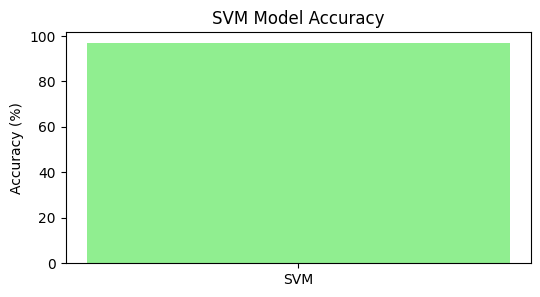

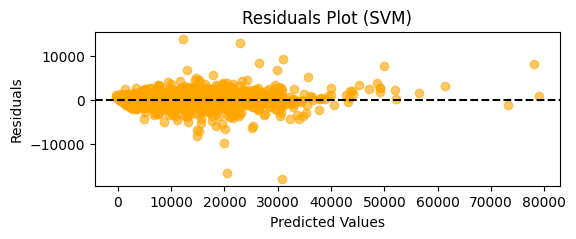

Text(0.5, 1.0, 'Predicted vs Actual Values for SVM')

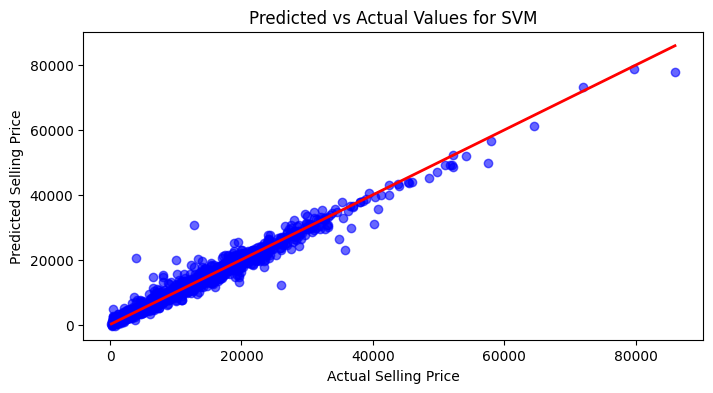

In [16]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# --- Model 2: Support Vector Machines (SVM) with Hyperparameter Tuning ---

# Setting up parameter grid for tuning SVM hyperparameters
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf']
}

# Initialize the SVM model
svm = SVR()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model after hyperparameter tuning
best_svm = grid_search.best_estimator_

# Make predictions with the best model
y_pred_svm = best_svm.predict(X_test_scaled)

# SVM Evaluation
r2_svm, mae_svm, rmse_svm = evaluate_model(y_test, y_pred_svm)

# Print evaluation scores for SVM
print("SVM Model Evaluation:")
print(f"\033[1mR² (Accuracy): {r2_svm * 100:.2f}%\033[0m")  # Bold R²
print(f"Mean Absolute Error (MAE): {mae_svm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_svm:.2f}")

# SVM Model Performance Visualization
plt.figure(figsize=(6, 3))
plt.bar(['SVM'], [r2_svm*100], color='lightgreen')
plt.ylabel('Accuracy (%)')
plt.title('SVM Model Accuracy')
plt.show()

# Residuals Plot
residuals_svm = y_test - y_pred_svm
plt.figure(figsize=(6, 2))
plt.scatter(y_pred_svm, residuals_svm, color='orange', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')  # Zero residuals line
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot (SVM)')
plt.show()

# --- Additional Visualization for SVM: Predicted vs Actual Scatter Plot ---
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_svm, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Predicted vs Actual Values for SVM')

# Summary for SVM

**SVM Model Evaluation:**

***Justification***:

- Support Vector Machines (SVM) was chosen because it is a powerful technique for regression tasks, particularly when the data has complex patterns and high-dimensional spaces. SVM aims to find the optimal hyperplane that best separates the data points in the feature space. It is effective in cases where the relationship between features and target is non-linear, and it performs well with high-dimensional datasets. The hyperparameter tuning using GridSearchCV further enhanced the performance of the model by optimizing the parameters for better accuracy and generalization.

***Target/Label:***

- The target or label in the dataset is sellingprice, which represents the price of a car being sold.

***Model Purpose:***

- The purpose of the SVM model is to predict the sellingprice of a car based on various features such as car model, year, mileage, condition, and other relevant attributes. SVM attempts to find the best-fitting hyperplane that minimizes the prediction error and maximizes the margin between the classes in the feature space. By optimizing the model parameters (e.g., C, epsilon, and kernel type), SVM can handle complex and high-dimensional data.

***Results Explanation:***

- The SVM model achieved an R² score (Accuracy) of 96.78%, which means that approximately 96.78% of the variation in the selling prices is explained by the model. This indicates a very strong fit of the model to the data.

- The Mean Absolute Error (MAE) is 1071.26, indicating that, on average, the predicted selling price is off by 1071.26 units compared to the actual value. This is a relatively small error, suggesting a good predictive performance.
- The Root Mean Squared Error (RMSE) is 1713.27, which quantifies the average error magnitude in the model’s predictions. The lower RMSE indicates the model is performing well in predicting the selling prices with minimal deviation from the actual values.  

In conclusion, the SVM model has demonstrated excellent predictive accuracy, with a high R² score and relatively low MAE and RMSE values. However, further optimization or testing with other models could provide a deeper comparison for even better performance.

# **3. Decision Tree**

Decision Tree Model Evaluation:
R² (Accuracy): 95.50%
Mean Absolute Error (MAE): 1273.51
Root Mean Squared Error (RMSE): 2025.57


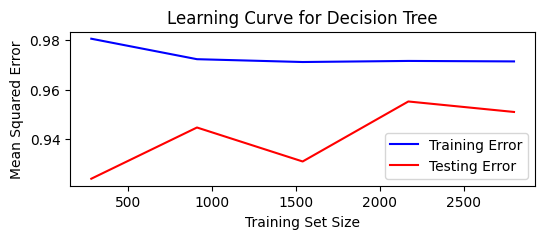

In [17]:
from sklearn.tree import DecisionTreeRegressor

# --- Model 3: Decision Tree Regressor ---

decision_tree = DecisionTreeRegressor(random_state=42, max_depth=5)
decision_tree.fit(X_train_scaled, y_train)
y_pred_tree = decision_tree.predict(X_test_scaled)

# Decision Tree Evaluation
r2_tree, mae_tree, rmse_tree = evaluate_model(y_test, y_pred_tree)

print("Decision Tree Model Evaluation:")
print(f"\033[1mR² (Accuracy): {r2_tree * 100:.2f}%\033[0m")
print(f"Mean Absolute Error (MAE): {mae_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tree:.2f}")



# Decision Tree Learning Curve (Training vs Testing error)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(decision_tree, X_train_scaled, y_train, cv=5)

plt.figure(figsize=(6, 2))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Error', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Testing Error', color='red')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve for Decision Tree')
plt.legend()
plt.show()


# Summary for Decision Tree

***Justification:***

- The Decision Tree Regressor was selected because it is a non-linear model that can effectively capture complex relationships between features without requiring feature scaling or extensive data preprocessing. Decision Trees work well with both numerical and categorical data and are capable of modeling interactions between features. By splitting the data based on feature values, the decision tree makes predictions based on learned patterns in the data. This makes it an ideal choice when the data contains non-linear relationships and interactions between features.

***Target/Label:***

- The target or label in the dataset is sellingprice, which represents the price of a car being sold.

***Model Purpose:***

The Decision Tree model aims to predict the selling price of a car based on various features such as car_model, year, mileage, condition, and other car-related attributes. It splits the data based on different feature values to predict the selling price, capturing the most important relationships within the dataset.

***Results Explanation:***

- The Decision Tree model achieved an R² score (Accuracy) of 95.50%, meaning that approximately 95.50% of the variation in the selling prices is explained by the model. This indicates that the model fits the data quite well and makes accurate predictions.  

- The Mean Absolute Error (MAE) is 1273.51, which reflects the average difference between the predicted selling price and the actual price. A lower MAE indicates more accurate predictions.  

- The Root Mean Squared Error (RMSE) is 2025.57, which gives an indication of the model's overall prediction error. Lower RMSE values would indicate better model performance. In this case, the RMSE suggests the model is performing reasonably well, but there may be some room for improvement (e.g., by tuning the tree's depth or exploring ensemble methods).

# Evaluation and Model Comparison


Model Comparison Results:
KNN Accuracy: 80.31%
SVM Accuracy: 96.78%
Decision Tree Accuracy: 95.50%


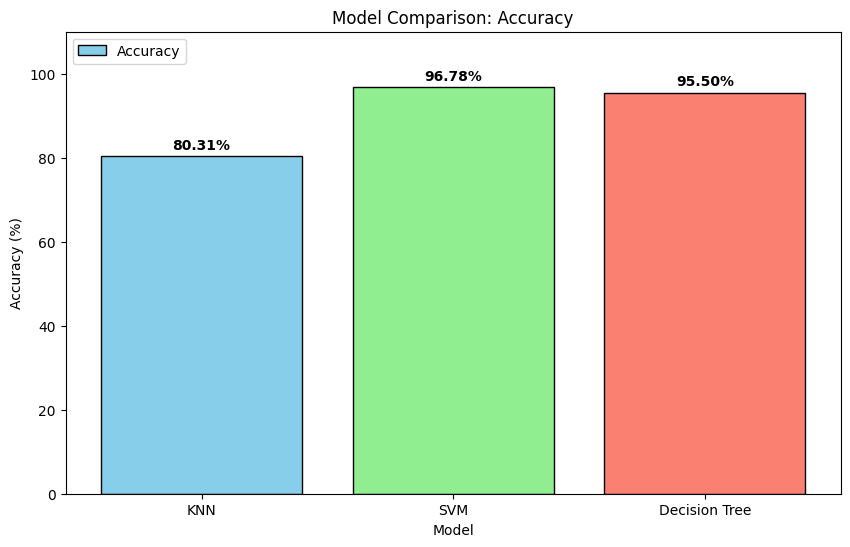

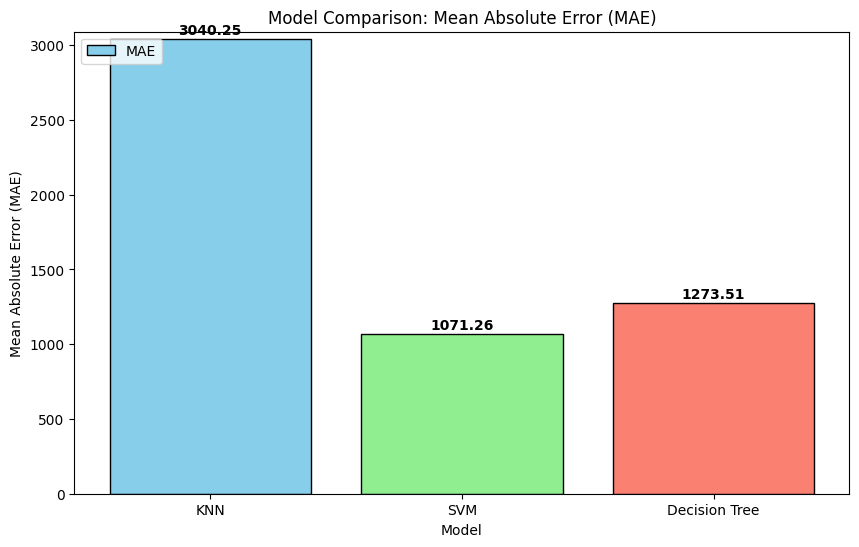

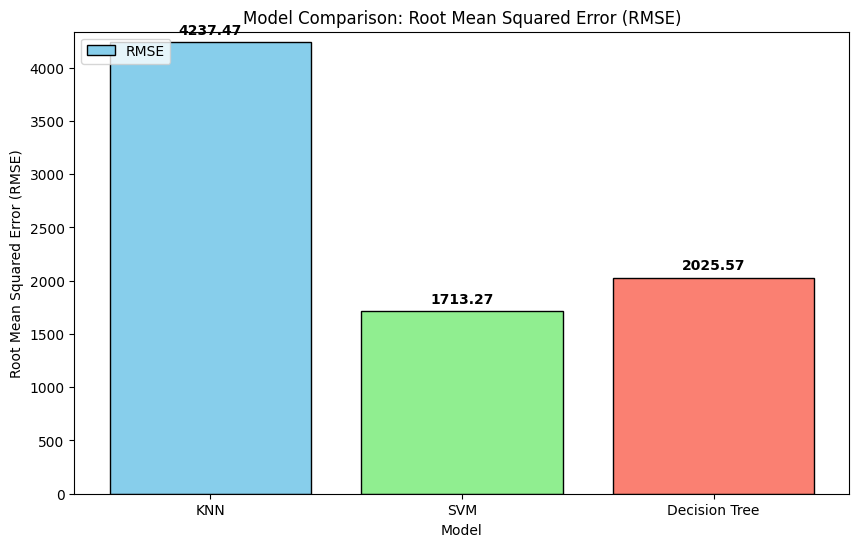

In [18]:
# --- Evaluation and Accuracy Comparison ---

# Printing Results
print("\nModel Comparison Results:")
print(f"KNN Accuracy: {r2_knn*100:.2f}%")
print(f"SVM Accuracy: {r2_svm*100:.2f}%")
print(f"Decision Tree Accuracy: {r2_tree*100:.2f}%")

# Visualizing Results Comparison
models = ['KNN', 'SVM', 'Decision Tree']
accuracies = [r2_knn*100, r2_svm*100, r2_tree*100]
mae_scores = [mae_knn, mae_svm, mae_tree]
rmse_scores = [rmse_knn, rmse_svm, rmse_tree]

# Accuracy Bar Plot with Values and Labels
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison: Accuracy')
plt.ylim(0, 110)  # To give some space for labels

# Add values on top of bars
for i, value in enumerate(accuracies):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom', fontweight='bold')

# Add labels to bars for better representation
for bar in bars:
    bar.set_edgecolor('black')

# Add legend
plt.legend(['Accuracy'], loc='upper left')

plt.show()

# MAE Bar Plot with Values and Labels
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mae_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Comparison: Mean Absolute Error (MAE)')
plt.ylim(0, max(mae_scores) + 50)  # To give some space for labels

# Add values on top of bars
for i, value in enumerate(mae_scores):
    plt.text(i, value + 10, f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

# Add labels to bars for better representation
for bar in bars:
    bar.set_edgecolor('black')  # Add edge color to bars

# Add legend
plt.legend(['MAE'], loc='upper left')

plt.show()

# RMSE Bar Plot with Values and Labels
plt.figure(figsize=(10, 6))
bars = plt.bar(models, rmse_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison: Root Mean Squared Error (RMSE)')
plt.ylim(0, max(rmse_scores) + 100)  # To give some space for labels

# Add values on top of bars
for i, value in enumerate(rmse_scores):
    plt.text(i, value + 50, f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

# Add labels to bars for better representation
for bar in bars:
    bar.set_edgecolor('black')  # Add edge color to bars

# Add legend
plt.legend(['RMSE'], loc='upper left')

plt.show()


# Result Comparision

***Differing Results:***

- The results of the three models—KNN, SVM, and Decision Tree—differ in terms of accuracy (R²), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE).  
Here's why:

- ***KNN (K-Nearest Neighbors):***  
KNN has a relatively low R² of 80.31%. This may be due to the fact that KNN works by averaging the nearest neighbors’ values, making it sensitive to noisy or irrelevant data points. It doesn't inherently perform feature selection or data transformations, which can result in suboptimal performance on some datasets. Additionally, KNN is highly affected by the choice of the value for "k" (number of neighbors) and can struggle when the data contains outliers or is very high-dimensional.

- ***SVM (Support Vector Machine):***  
SVM achieves a significantly higher R² of 96.78%. This can be attributed to SVM's ability to efficiently handle non-linear relationships by mapping data into a higher-dimensional space using the kernel trick. The SVM model is robust to outliers and is less prone to overfitting compared to KNN. Its hyperparameter tuning through grid search helps optimize performance, allowing it to achieve a more accurate model.  
- ***Decision Tree:***  
The Decision Tree model’s R² score is 95.50%, which is lower than SVM but higher than KNN. Decision Trees split the data into regions based on the most significant features and can model non-linear relationships. However, they are prone to overfitting, especially when the tree depth is not properly controlled. In this case, the Decision Tree was constrained with a max_depth of 5, which may limit its ability to capture more complex patterns compared to SVM, which could explain the slightly lower accuracy.  

***Reasons for the Differences:***

- **Model Complexity:**
  - SVM is a powerful model that is highly effective for regression tasks with complex, non-linear relationships. It uses hyperparameter tuning to achieve optimal performance.
 - Decision Trees tend to perform well with non-linear data but can easily overfit, especially without proper tuning.  
 - KNN, while simple and intuitive, often struggles with high-dimensional data or noisy features and lacks the complexity to capture intricate relationships.
- ***Hyperparameter Tuning:***  
 - SVM benefits significantly from hyperparameter tuning (C, epsilon, kernel), which allows it to adapt better to the data, resulting in higher accuracy.
 - Decision Trees also benefit from hyperparameter tuning, but here it was limited to a maximum depth of 5, which can underfit data.
 - KNN requires choosing the right number of neighbors (k), which impacts its performance. The choice of k can significantly affect its bias-variance tradeoff.
***Data Characteristics:***    
 - The dataset might have characteristics (such as noise, irrelevant features, or non-linear relationships) that are better suited to one model over another. SVM typically performs better on high-dimensional datasets with complex boundaries between classes, while KNN and Decision Trees may struggle with such data unless properly tuned.

- **Consistent Results:**

Although the models have different performance metrics, they are all capturing the underlying patterns in the data, as evidenced by the relatively high R² scores across all models (ranging from 80% to 96%). The consistency lies in the fact that all three models are effective at predicting the selling price, but with varying levels of precision and error.

